In [1]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import math
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import MLPClassifier

from sklearn import svm


In [2]:
from google.colab import files

# Upload all files first
uploaded = files.upload()


Saving olive (1).csv to olive (1) (1).csv


In [3]:

dataset_path = "olive (1).csv"
df_ol = pd.read_csv(dataset_path)
df_ol.head(2)
print(len(df_ol))
#df_ol['Region'].unique()

572


* configure the dataset :
  * correct the type :

In [4]:
df_ol.loc[df_ol['Region'] == 'North-Apulia', 'Region'] = 'extra virgin olive oil'
df_ol.loc[df_ol['Region'] == 'South-Apulia', 'Region'] = 'extra virgin olive oil'
df_ol.loc[df_ol['Region'] == 'Calabria', 'Region'] = 'organic extra virgin olive oil'
df_ol.loc[df_ol['Region'] == 'Sicily', 'Region'] = 'organic extra virgin olive oil'
df_ol.loc[df_ol['Region'] == 'Inland-Sardinia', 'Region'] = 'extra virgin olive oil'
df_ol.loc[df_ol['Region'] == 'Coast-Sardinia', 'Region'] = 'extra virgin olive oil'
df_ol.loc[df_ol['Region'] == 'Umbria', 'Region'] = 'extra virgin olive oil'
df_ol.loc[df_ol['Region'] == 'East-Liguria', 'Region'] = 'extra virgin olive oil'
df_ol.loc[df_ol['Region'] == 'West-Liguria', 'Region'] = 'extra virgin olive oil'
print(len(df_ol))
print(df_ol['Region'].unique())

572
['extra virgin olive oil' 'organic extra virgin olive oil']


*  
 *  removing unnecessary Fields :

In [5]:
df_ol=df_ol.drop('id' , axis= 1)
df_ol=df_ol.drop('other' , axis= 1)
df_ol=df_ol.drop('Area' , axis= 1)
df_ol.head(2)
len(df_ol)

572


```

* data augmentation :



In [6]:
# divide the data :
df_ol_organic = df_ol[df_ol['Region'] == 'organic extra virgin olive oil']
df_ol_extra = df_ol[df_ol['Region'] == 'extra virgin olive oil']

df_ol_organic.loc[df_ol_organic['Region'] == 'organic extra virgin olive oil', 'Region'] = 1


In [7]:
# Fit the Gaussian mixture model to the data :
column_names = df_ol_organic.columns.tolist()

gmm = GaussianMixture(n_components=1) # we chose to have 1 container
gmm.fit(df_ol_organic)

n_samples = len(df_ol_organic) / 2
generated_data = gmm.sample(n_samples)[0]
generated_data = pd.DataFrame(generated_data, columns=column_names)

# concatenate the generated data with your original dataset
df_ol_organic = pd.concat([df_ol_organic, generated_data])

df_ol_organic['Region'] = 'organic extra virgin olive oil'


In [8]:
# Reconcatinate the data :
df_ol = pd.concat([df_ol_organic, df_ol_extra])
df_ol = df_ol.reset_index(drop=True)
df_ol.head()

,Region,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,organic extra virgin olive oil,2.0,1315.0,139.0,230.0,7299.0,832.0,42.0,60.0
1,organic extra virgin olive oil,2.0,1321.0,136.0,217.0,7174.0,950.0,43.0,63.0
2,organic extra virgin olive oil,2.0,1359.0,115.0,246.0,7234.0,874.0,45.0,63.0
3,organic extra virgin olive oil,2.0,1378.0,111.0,272.0,7127.0,940.0,46.0,64.0
4,organic extra virgin olive oil,2.0,1295.0,109.0,245.0,7253.0,903.0,43.0,62.0


## EDA

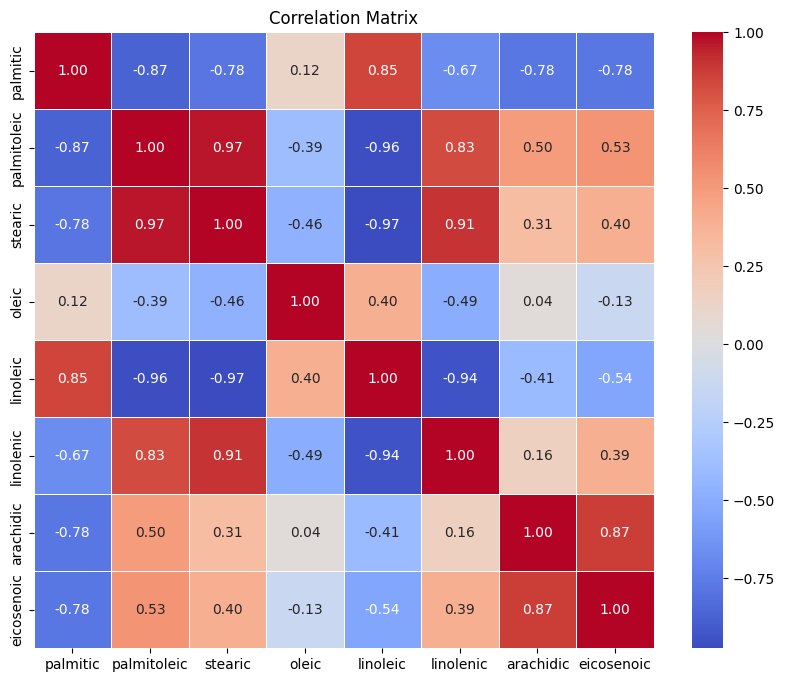

In [9]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

numerical_cols = df_ol.select_dtypes(include=['number']).columns

correlation_matrix = df_ol[numerical_cols].corr()

correlation_matrix

correlation_matrix = correlation_matrix.corr()

plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


<ipython-input-10-94d67a1c7428>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_ol, x='stearic', y='Region', inner='box', palette='Dark2')


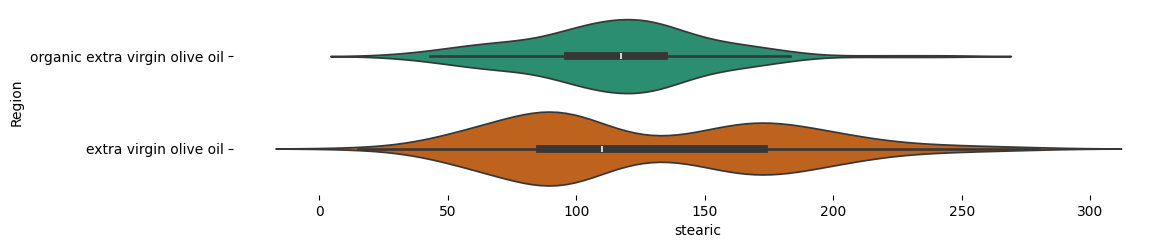

In [10]:
# @title Region vs stearic

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_ol['Region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_ol, x='stearic', y='Region', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-11-5e7257183bc2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_ol, x='oleic', y='Region', inner='box', palette='Dark2')


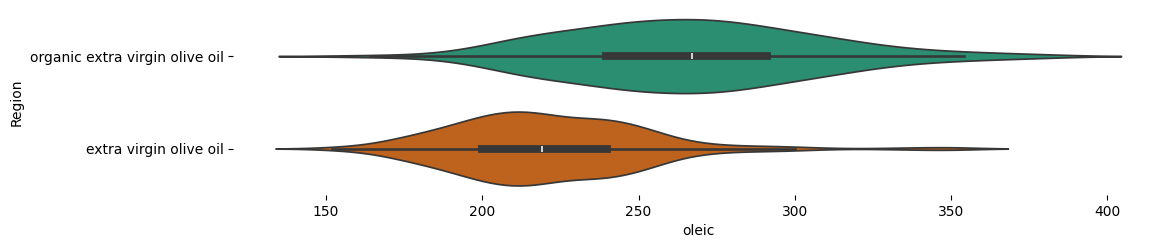

In [11]:
# @title Region vs oleic

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_ol['Region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_ol, x='oleic', y='Region', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-12-660a9f74d91d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_ol, x='palmitic', y='Region', inner='box', palette='Dark2')


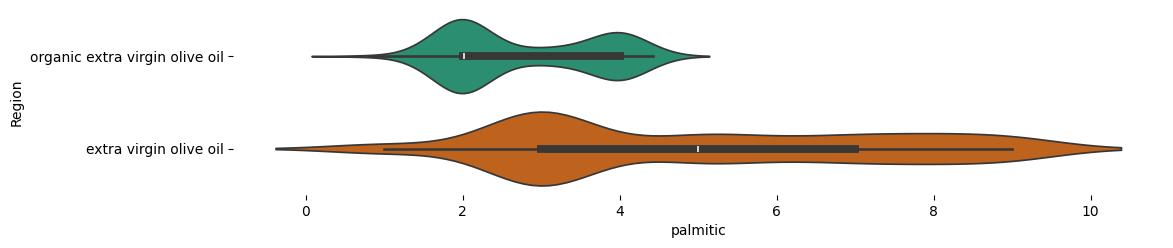

In [12]:
# @title Region vs palmitic

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_ol['Region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_ol, x='palmitic', y='Region', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

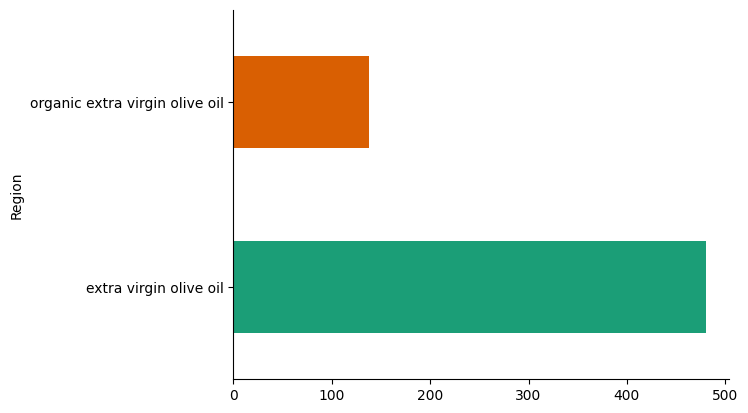

In [13]:
# @title Region

from matplotlib import pyplot as plt
import seaborn as sns
df_ol.groupby('Region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

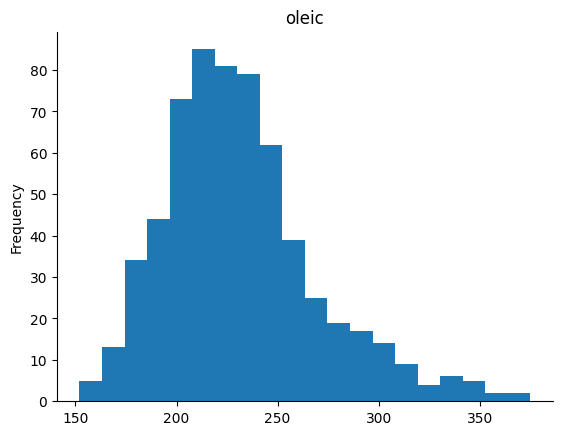

In [14]:
# @title oleic

from matplotlib import pyplot as plt
df_ol['oleic'].plot(kind='hist', bins=20, title='oleic')
plt.gca().spines[['top', 'right',]].set_visible(False)

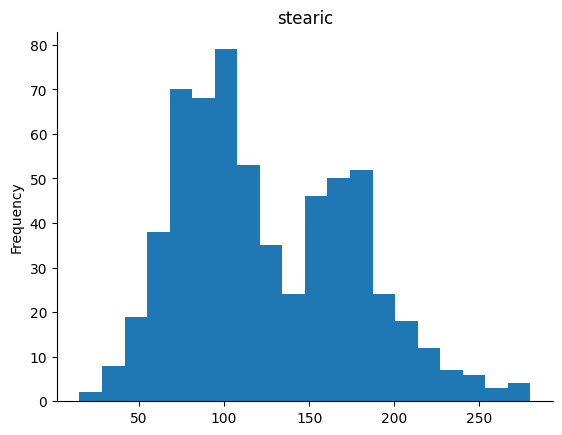

In [15]:
# @title stearic

from matplotlib import pyplot as plt
df_ol['stearic'].plot(kind='hist', bins=20, title='stearic')
plt.gca().spines[['top', 'right',]].set_visible(False)

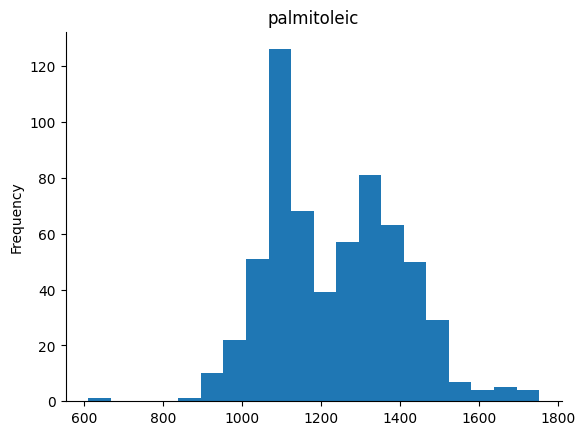

In [16]:
# @title palmitoleic

from matplotlib import pyplot as plt
df_ol['palmitoleic'].plot(kind='hist', bins=20, title='palmitoleic')
plt.gca().spines[['top', 'right',]].set_visible(False)

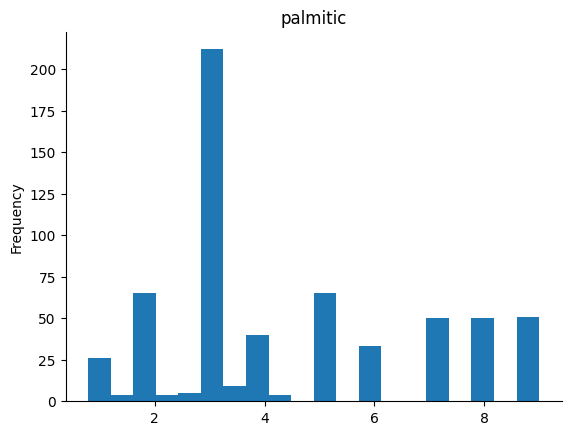

In [17]:
# @title palmitic

from matplotlib import pyplot as plt
df_ol['palmitic'].plot(kind='hist', bins=20, title='palmitic')
plt.gca().spines[['top', 'right',]].set_visible(False)

* divide data for training and prediction :

In [18]:
# specify your features and target variable
X = df_ol.drop('Region', axis=1)
y = df_ol['Region']

# split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_precision = pd.DataFrame(columns=['Algorithm', 'precision'])


In [19]:
from sklearn.model_selection import GridSearchCV

def grid_search_model(model, param_grid, X_train, y_train, scoring='accuracy', cv=5):

  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=cv)
  grid_search.fit(X_train, y_train)

  print("Best hyperparameters:", grid_search.best_params_)
  print("Best score:", grid_search.best_score_)

  return grid_search


In [20]:
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    return accuracy, precision, recall, f1

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    return plt


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, labels):
  cm = confusion_matrix(y_true, y_pred, labels=labels)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
              xticklabels=labels, yticklabels=labels)
  plt.xlabel("Predicted")
  plt.ylabel("True")
  plt.title("Confusion Matrix")
  plt.show()

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_auc(model, X_test, y_test, model_name="Model", pos_label=None):

    # Get probability estimates
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]  # probability of positive class
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    else:
        raise ValueError("Model does not have predict_proba or decision_function method.")

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label=pos_label)  # Pass pos_label to roc_curve
    auc_score = roc_auc_score(y_test, y_scores)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # random classifier line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    return auc_score

* Naïve Bayesian

Naive bayes Accuracy: 0.9193548387096774
Best hyperparameters: {'var_smoothing': 1e-09}
Best score: 0.9514120799835085


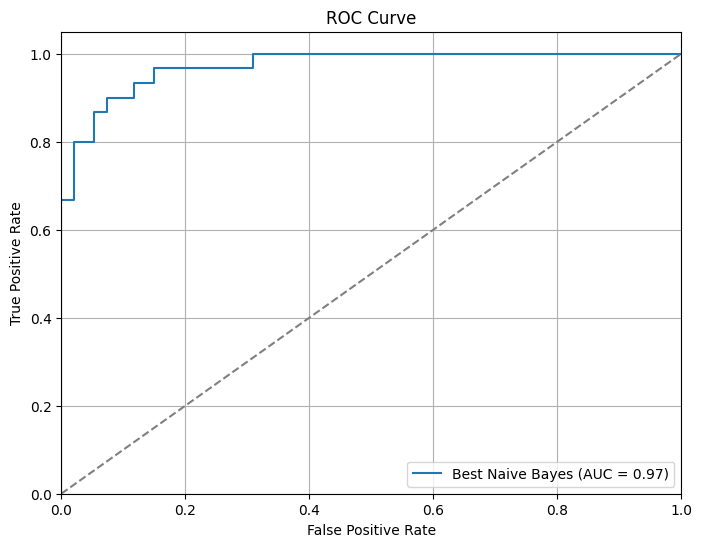

Best Naive Bayes ROC AUC Score: 0.9720


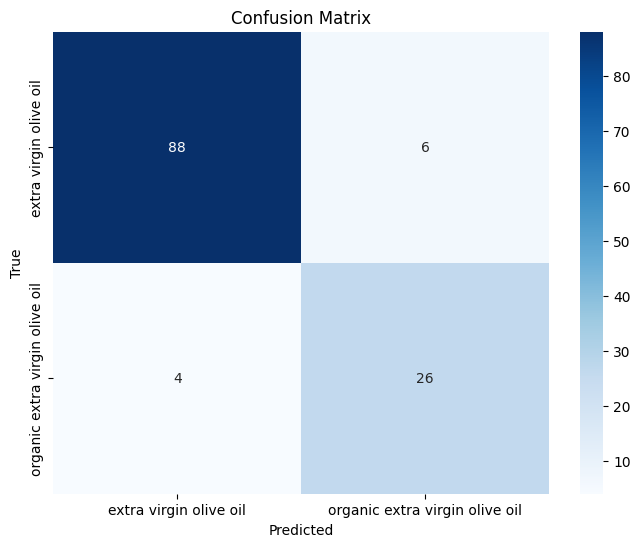


--- Evaluation Metrics for Best Naive Bayes Model ---
Accuracy: 0.9193548387096774
Precision: 0.9216777699859748
Recall: 0.9193548387096774
F1 Score: 0.9202219909816165


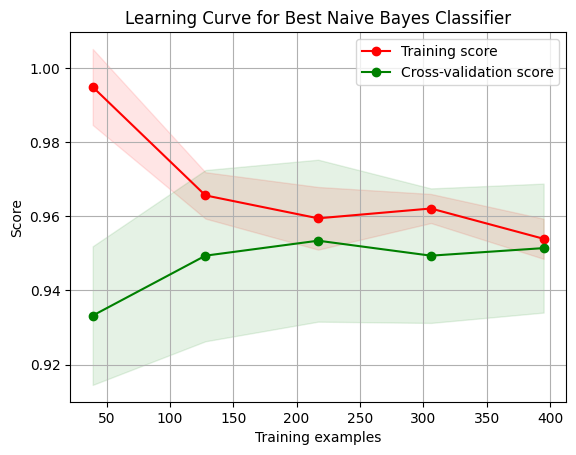

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

In [26]:
# create a Gaussian Naive Bayes classifier object
gnb = GaussianNB()

# train the classifier on the training set
gnb.fit(X_train, y_train)

# make predictions on the testing set
y_pred = gnb.predict(X_test)
pred_df_features = pd.DataFrame(X_test)
pred_df = X_test.copy()
pred_df['Region'] = y_test
pred_df['Region_pred'] = y_pred

pred_df.head(5)

# evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Naive bayes Accuracy:", accuracy)

param_grid_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
grid_search_result = grid_search_model(gnb, param_grid_gnb, X_train, y_train)
best_gnb = grid_search_result.best_estimator_
best_gnb.fit(X_train, y_train)
y_pred = best_gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


# Convert string labels to numerical values for ROC curve calculation

lb = LabelBinarizer()
y_test_numeric = lb.fit_transform(y_test) # Fit and transform on y_test
y_pred_numeric = lb.transform(y_pred)      # Transform y_pred using the same binarizer


# Plot ROC Curve and compute AUC for Best Naive Bayes Model
auc_score = plot_roc_auc(best_gnb, X_test, y_test, model_name="Best Naive Bayes", pos_label='organic extra virgin olive oil')
print(f"Best Naive Bayes ROC AUC Score: {auc_score:.4f}")


model_precision = pd.concat([model_precision, pd.DataFrame([{'Algorithm': 'Naive bayes', 'precision': accuracy}])], ignore_index=True)

plot_confusion_matrix(y_test, y_pred, labels=lb.classes_)

print("\n--- Evaluation Metrics for Best Naive Bayes Model ---")
accuracy, precision, recall, f1 = evaluate_model(best_gnb, X_test, y_test)

plot_learning_curve(
    best_gnb,
    title="Learning Curve for Best Naive Bayes Classifier",
    X=X_train,
    y=y_train,
    cv=5
)









* Nearest Neighbors (-NN)

Best n_neighbors value: 2


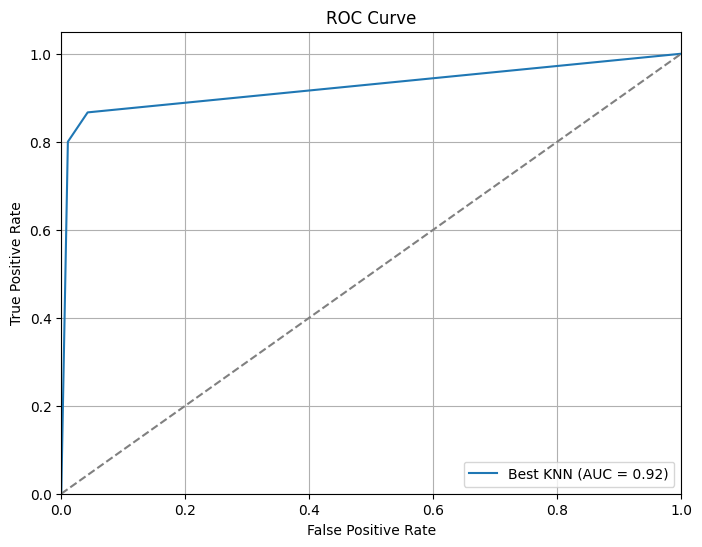

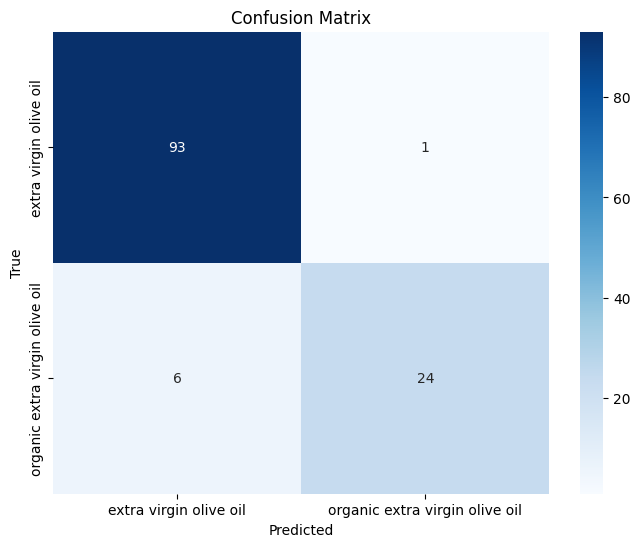

Accuracy: 0.9435483870967742
Precision: 0.9443792766373412
Recall: 0.9435483870967742
F1 Score: 0.9417136432011912


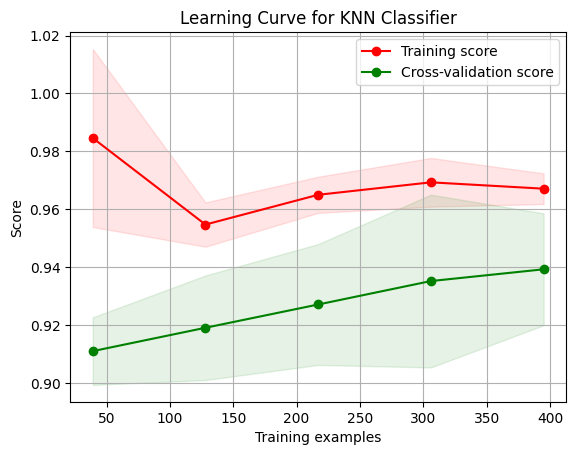

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

In [27]:
# define a range of n_neighbors values to test (we choose k that will give us the value)
k_values = range(1, 20)

# use cross-validation to evaluate each n_neighbors value
validation_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)  # use 5-fold cross-validation
    validation_scores.append(scores.mean())

# choose the best n_neighbors value
best_k = k_values[validation_scores.index(max(validation_scores))]
print("Best n_neighbors value:", best_k)

# train a new KNN model on the entire dataset using the best n_neighbors value
final_knn_model = KNeighborsClassifier(n_neighbors=best_k)

# Train the model
final_knn_model.fit(X_train, y_train)

# Test the model
y_pred = final_knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
model_precision = pd.concat([model_precision, pd.DataFrame([{
    'Algorithm': 'Nearest Neighbors', 'precision': accuracy
}])], ignore_index=True)

# Calculate the accuracy score

auc_score = plot_roc_auc(final_knn_model, X_test, y_test, model_name="Best KNN", pos_label='organic extra virgin olive oil')


# --- Confusion Matrix ---
plot_confusion_matrix(y_test, y_pred, labels=lb.classes_)
accuracy, precision, recall, f1 = evaluate_model(final_knn_model, X_test, y_test)

plot_learning_curve(
    final_knn_model,
    title="Learning Curve for KNN Classifier",
    X=X_train,
    y=y_train,
    cv=5
)



* Linear Discriminate Analysis (LDA)



Linear Discriminant Analysis (LDA) is a technique used in machine learning and statistics to find a linear combination of features that characterizes or separates two or more classes of objects or events. LDA is often used as a dimensionality reduction technique in data preprocessing or feature extraction, as well as a supervised learning algorithm for classification.In our case we'll use it as an algorithm for classification

Accuracy: 0.9274193548387096


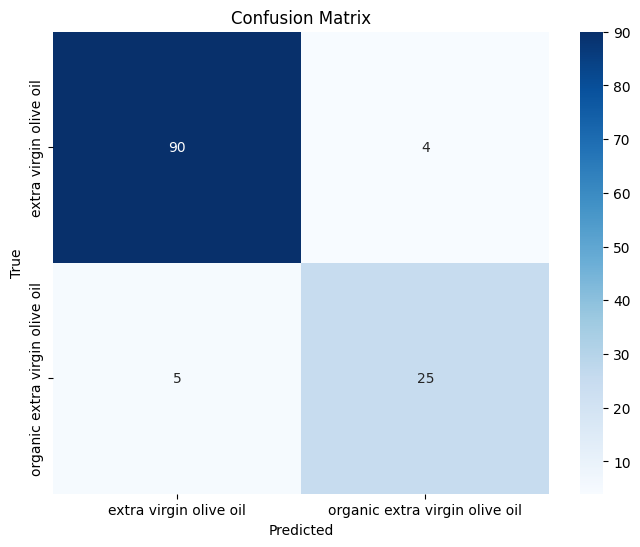


--- Evaluation Metrics for Best LDA Model ---
Accuracy: 0.9274193548387096
Precision: 0.9267314560037468
Recall: 0.9274193548387096
F1 Score: 0.9269962769142649


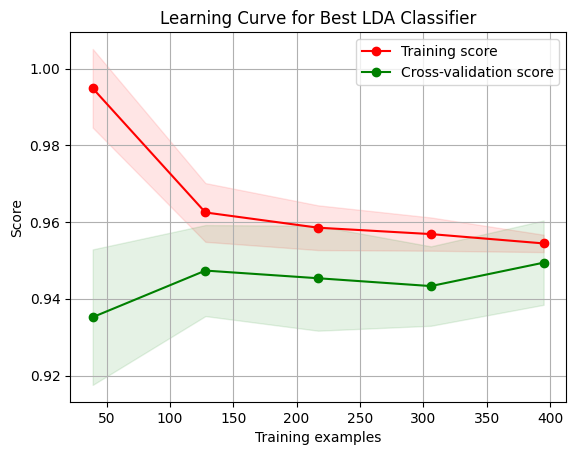

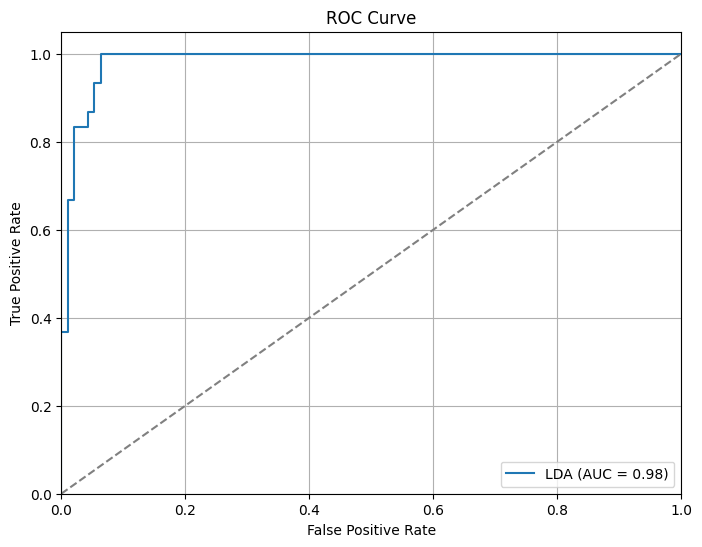

LDA ROC AUC Score: 0.9840


In [28]:
# create an LDA model and fit it on the training data
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# predict the classes of the testing set using the trained model
y_pred = lda.predict(X_test)

# calculate the accuracy of the model
accuracy = lda.score(X_test, y_test)

print("Accuracy:", accuracy)

model_precision = pd.concat([model_precision, pd.DataFrame([{'Algorithm': 'LDA', 'precision': accuracy}])], ignore_index=True)


plot_confusion_matrix(y_test, y_pred, labels=lb.classes_)

# --- Evaluation Metrics ---
print("\n--- Evaluation Metrics for Best LDA Model ---")
accuracy, precision, recall, f1 = evaluate_model(lda, X_test, y_test)

# Plot Learning Curve for Best LDA Model
plot_learning_curve(
    lda,
    title="Learning Curve for Best LDA Classifier",
    X=X_train,
    y=y_train,
    cv=5
)

# Specify pos_label in the plot_roc_auc function call
auc_score = plot_roc_auc(lda, X_test, y_test, model_name="LDA", pos_label='organic extra virgin olive oil')
print(f"LDA ROC AUC Score: {auc_score:.4f}")



* Decision Tree


Accuracy: 0.9596774193548387
Confusion Matrix:
[[93  1]
 [ 4 26]]
Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score: 0.9777365491651206


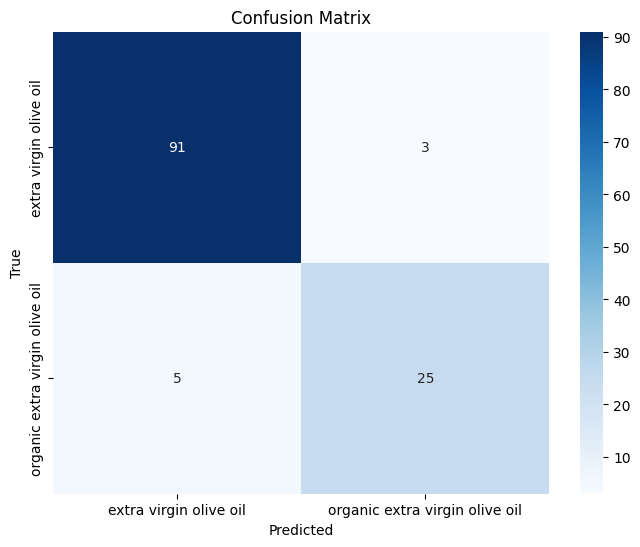


--- Evaluation Metrics for Decision tree ---
Accuracy: 0.9274193548387096
Precision: 0.9267314560037468
Recall: 0.9274193548387096
F1 Score: 0.9269962769142649


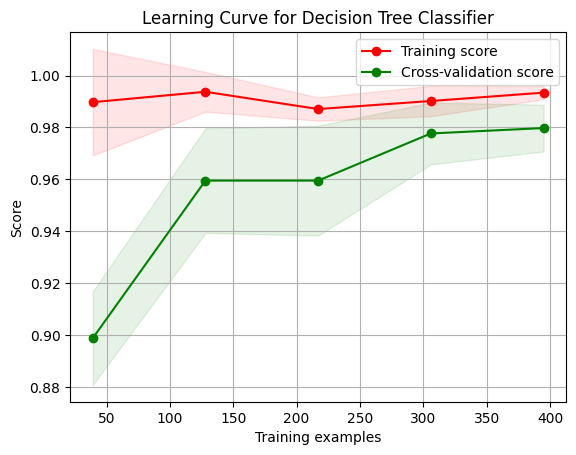

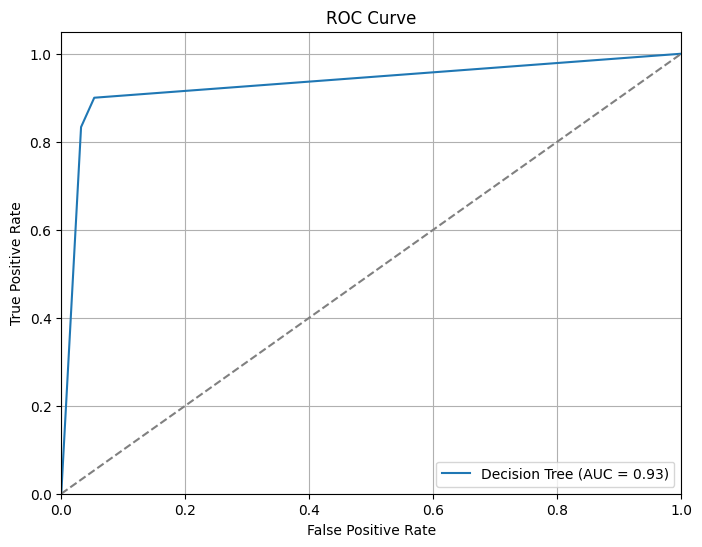

Decision Tree ROC AUC Score: 0.9312


In [29]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}


grid_search_result = grid_search_model(dt, param_grid, X_train, y_train)
dt = grid_search_result.best_estimator_
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)



model_precision = pd.concat([model_precision, pd.DataFrame([{'Algorithm': 'DecisionTreeClassifier', 'precision': accuracy}])], ignore_index=True)


plot_confusion_matrix(y_test, y_pred, labels=lb.classes_)

# --- Evaluation Metrics ---
print("\n--- Evaluation Metrics for Decision tree ---")
accuracy, precision, recall, f1 = evaluate_model(lda, X_test, y_test)

plot_learning_curve(
    dt,
    title="Learning Curve for Decision Tree Classifier",
    X=X_train,
    y=y_train,
    cv=5
)

# Plot ROC Curve and compute AUC using the fixed function
auc_score = plot_roc_auc(dt, X_test, y_test, model_name="Decision Tree", pos_label='organic extra virgin olive oil')
print(f"Decision Tree ROC AUC Score: {auc_score:.4f}")

* Artificial Neural Networks (ANN)


most common parameters of MLPClassifier :
* hidden_layer_sizes: This parameter determines the number of neurons in each layer of the neural network. You can specify a single number to create a single hidden layer with that many neurons, or you can specify a tuple to create multiple hidden layers with the specified number of neurons in each layer.

* activation: This parameter determines the activation function to use for each neuron in the network. The default is 'relu', but you can also choose 'logistic', 'tanh', or 'identity'.

* solver: This parameter determines the optimization algorithm to use to train the neural network. The default is 'adam', but you can also choose 'lbfgs' or 'sgd'.

* alpha: This parameter determines the regularization strength. It is used to help prevent overfitting by adding a penalty term to the error function.

* batch_size: This parameter determines the number of samples to use in each batch during training. Larger batch sizes can help speed up training, but smaller batch sizes may lead to better generalization.

* learning_rate: This parameter determines how the learning rate is adapted during training. The default is 'constant', but you can also choose 'invscaling' or 'adaptive'.

* max_iter: This parameter determines the maximum number of iterations (epochs) to use during training.

* random_state: This parameter determines the random seed used by the random number generator.

Note : For a small dataset with 300 instances, it is generally recommended to start with a simpler network architecture to avoid overfitting. A simple approach to choosing the number of neurons in a single hidden layer is to use a rule of thumb based on the number of input and output neurons. A commonly used rule of thumb is to set the number of neurons in the hidden layer to be the mean of the number of neurons in the input and output layers, or to set it to be some multiple of this value.

hidden_layer_sizesarray-like of shape(n_layers - 2,), default=(100,)
The ith element represents the number of neurons in the ith hidden layer.

activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
Activation function for the hidden layer.

‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x

‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).

‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).

‘relu’, the rectified linear unit function, returns f(x) = max(0, x)

Accuracy: 0.9193548387096774


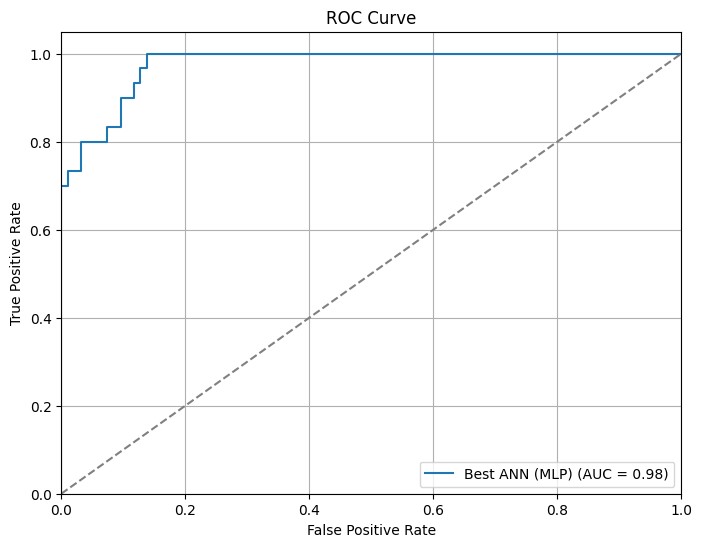


Confusion Matrix:
[[91  3]
 [ 7 23]]


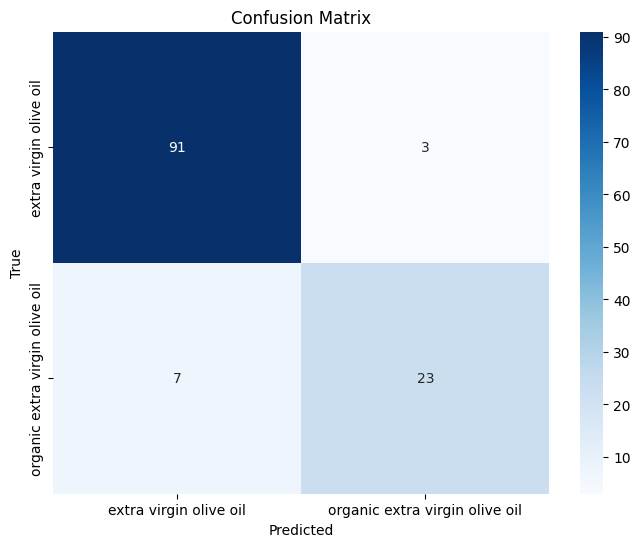


--- Evaluation Metrics for Best ANN Model ---
Accuracy: 0.9193548387096774
Precision: 0.9179369018078696
Recall: 0.9193548387096774
F1 Score: 0.917314708141321


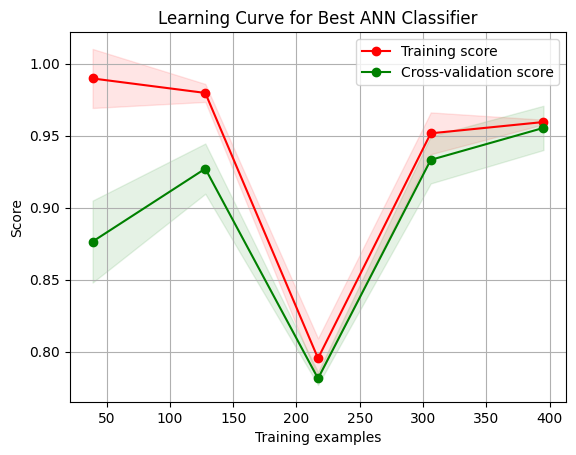


Best parameters used for ANN:
Hidden Layers: (70,), Activation Function: logistic


In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, RocCurveDisplay
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# --- Model Training ---
clf = MLPClassifier(hidden_layer_sizes=(70,), max_iter=1000, activation='logistic', random_state=42)
clf.fit(X_train, y_train)

# --- Predictions ---
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# --- Accuracy ---
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# --- ROC AUC Curve ---
auc_score = plot_roc_auc(clf, X_test, y_test, model_name="Best ANN (MLP)", pos_label='organic extra virgin olive oil')


# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

plot_confusion_matrix(y_test, y_pred, labels=lb.classes_)

# --- Evaluation Metrics ---
print("\n--- Evaluation Metrics for Best ANN Model ---")
accuracy, precision, recall, f1 = evaluate_model(clf, X_test, y_test)

# --- Add to Model Precision DataFrame ---
model_precision = pd.concat([
    model_precision,
    pd.DataFrame([{'Algorithm': 'ANN', 'precision': accuracy}])
], ignore_index=True)

# --- Plot Learning Curve ---
plot_learning_curve(
    clf,
    title="Learning Curve for Best ANN Classifier",
    X=X_train,
    y=y_train,
    cv=5
)

# --- Extra: Print Best Parameters ---
print("\nBest parameters used for ANN:")
print(f"Hidden Layers: {clf.hidden_layer_sizes}, Activation Function: {clf.activation}")


* Support Vector Machine (SVM)

Accuracy: 0.9193548387096774


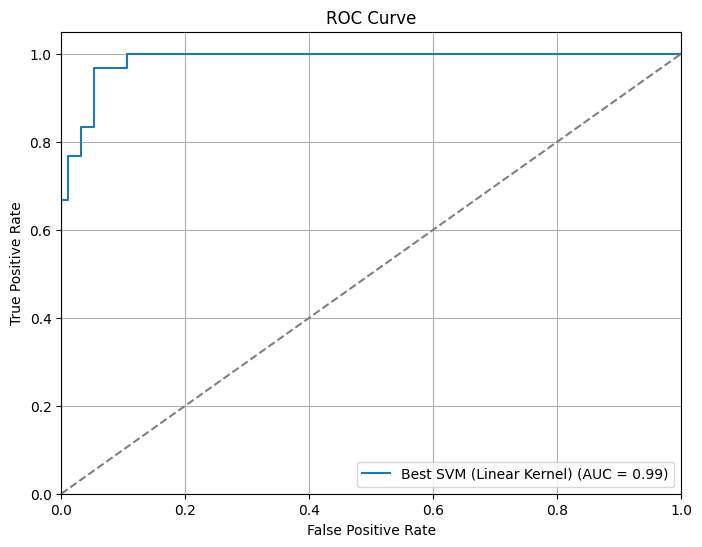

Confusion Matrix:
[[89  5]
 [ 5 25]]


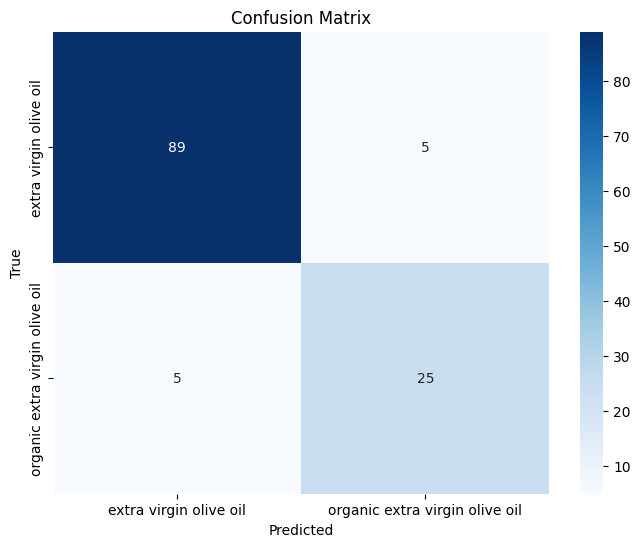


--- Evaluation Metrics for Best SVM Model ---
Accuracy: 0.9193548387096774
Precision: 0.9193548387096774
Recall: 0.9193548387096774
F1 Score: 0.9193548387096774


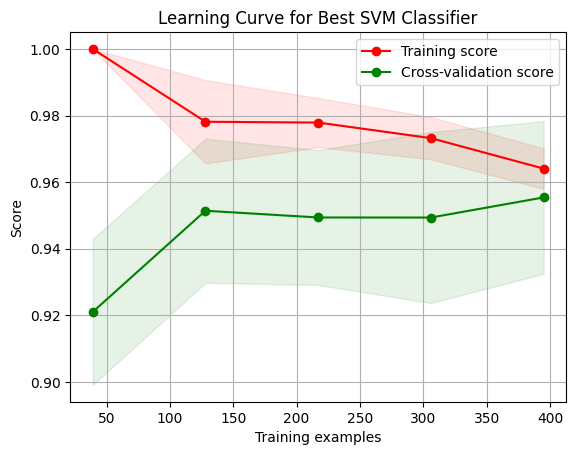

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

In [31]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))
auc_score = plot_roc_auc(clf, X_test, y_test, model_name="Best SVM (Linear Kernel)", pos_label='organic extra virgin olive oil')


# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


model_precision = pd.concat([model_precision, pd.DataFrame([{'Algorithm': 'SVM', 'precision': accuracy}])], ignore_index=True)

plot_confusion_matrix(y_test, y_pred, labels=lb.classes_)

# --- Evaluation Metrics ---
print("\n--- Evaluation Metrics for Best SVM Model ---")
accuracy, precision, recall, f1 = evaluate_model(clf, X_test, y_test)

# --- Plot Learning Curve ---
plot_learning_curve(
    clf,
    title="Learning Curve for Best SVM Classifier",
    X=X_train,
    y=y_train,
    cv=5
)

* compare presicions :

In [32]:
print(model_precision)

                Algorithm  precision
0             Naive bayes   0.919355
1             Naive bayes   0.919355
2       Nearest Neighbors   0.943548
3                     LDA   0.927419
4  DecisionTreeClassifier   0.935484
5                     ANN   0.919355
6                     SVM   0.919355
